In [2]:
# Outlier Removal using IQR Method
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# 2. Load dataset
df_before= pd.read_csv("../data/encode_dataset.csv")


In [6]:
# 3. Select numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [25]:
# 4. Save original shape for comparison
original_shape = df_before.shape


In [26]:
# 5. Calculate Q1, Q3, and IQR
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df_before['TotalCharges'] = pd.to_numeric(df_before['TotalCharges'], errors='coerce')

Q1 = df_before[num_cols].quantile(0.25)   # 25th percentile
Q3 = df_before[num_cols].quantile(0.75)   # 75th percentile
IQR = Q3 - Q1                             # Interquartile Range

In [12]:
# 6. Identify outliers for each numerical column
print("===== Outliers in Each Column =====")
for col in num_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers = df_before[(df_before[col] < lower_bound) | (df_before[col] > upper_bound)][col]
    print(f"{col} - Number of outliers: {len(outliers)}")
    print(outliers.values, "\n")   # Display actual outlier values


===== Outliers in Each Column =====
tenure - Number of outliers: 0
[] 

MonthlyCharges - Number of outliers: 0
[] 

TotalCharges - Number of outliers: 0
[] 



In [14]:
# 7. Remove outliers (values outside Q1 - 1.5*IQR and Q3 + 1.5*IQR)
df_after = df_before[~((df_before[num_cols] < (Q1 - 1.5 * IQR)) |
                       (df_before[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [16]:
# 8. Compare dataset shapes before and after outlier removal
print("Shape before:", original_shape)   # Original dataset size
print("Shape after :", df_after.shape)   # After outlier removal


Shape before: (7043, 32)
Shape after : (7043, 32)


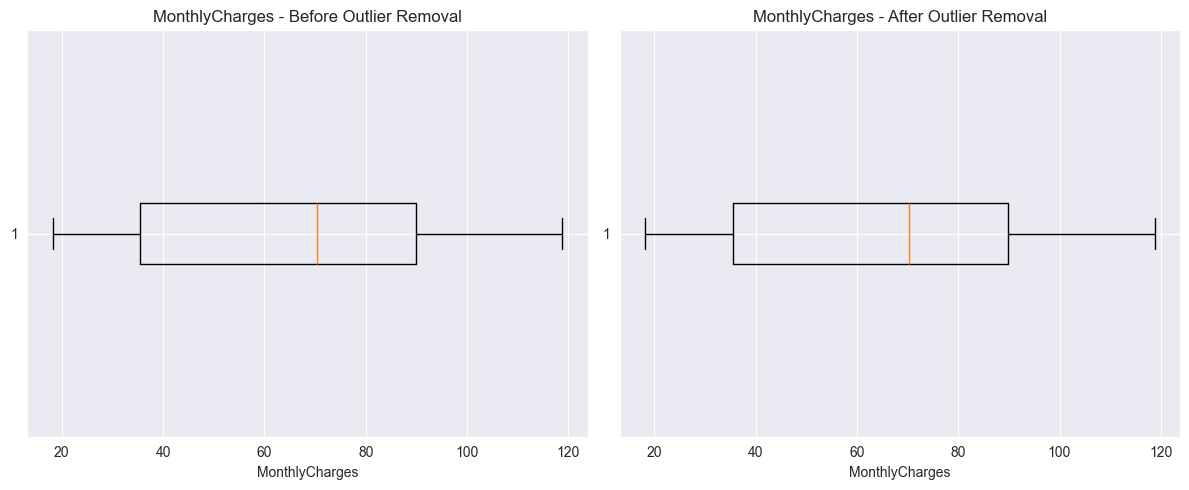

In [20]:
# 9. Visualization - Boxplots (Before vs After for MonthlyCharges)
plt.figure(figsize=(12,5))

# Before outlier removal
plt.subplot(1,2,1)
plt.boxplot(df_before['MonthlyCharges'], vert=False)
plt.title('MonthlyCharges - Before Outlier Removal')
plt.xlabel('MonthlyCharges')

# After outlier removal
plt.subplot(1,2,2)
plt.boxplot(df_after['MonthlyCharges'], vert=False)
plt.title('MonthlyCharges - After Outlier Removal')
plt.xlabel('MonthlyCharges')

plt.tight_layout()
plt.show

plt.savefig('../results/eda_visualizations/IT24101551/totalcharges_distribution4.png',
            dpi=300, bbox_inches='tight')
plt.show()


plt.close()

In [24]:
df_before.to_csv("C:/Users/ASUS TUF/PycharmProjects/2025-Y2-S1-MLB-B6G2-07/data/Outlier_remove_dataset.csv", index=False)
